In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("data\Rport.csv")
df

,Data,Equal Weights,HRP,MV
0,2005-01-01,-5.768847,-4.420817,-2.355550
1,2005-02-01,14.548543,12.923189,10.937546
2,2005-03-01,-6.405159,-6.251613,-5.384795
3,2005-04-01,-6.622281,-9.624687,-15.582348
4,2005-05-01,4.035351,3.453695,3.275437
...,...,...,...,...
205,2022-02-01,-2.031817,-0.608951,2.046017
206,2022-03-01,5.703848,6.404985,6.320585
207,2022-04-01,-6.545801,-5.243801,-5.107131
208,2022-05-01,5.022972,2.550641,1.081142


In [3]:
df['Data'] = df['Data'].astype('datetime64[ns]')
df

,Data,Equal Weights,HRP,MV
0,2005-01-01,-5.768847,-4.420817,-2.355550
1,2005-02-01,14.548543,12.923189,10.937546
2,2005-03-01,-6.405159,-6.251613,-5.384795
3,2005-04-01,-6.622281,-9.624687,-15.582348
4,2005-05-01,4.035351,3.453695,3.275437
...,...,...,...,...
205,2022-02-01,-2.031817,-0.608951,2.046017
206,2022-03-01,5.703848,6.404985,6.320585
207,2022-04-01,-6.545801,-5.243801,-5.107131
208,2022-05-01,5.022972,2.550641,1.081142


<AxesSubplot: xlabel='Data', ylabel='value'>

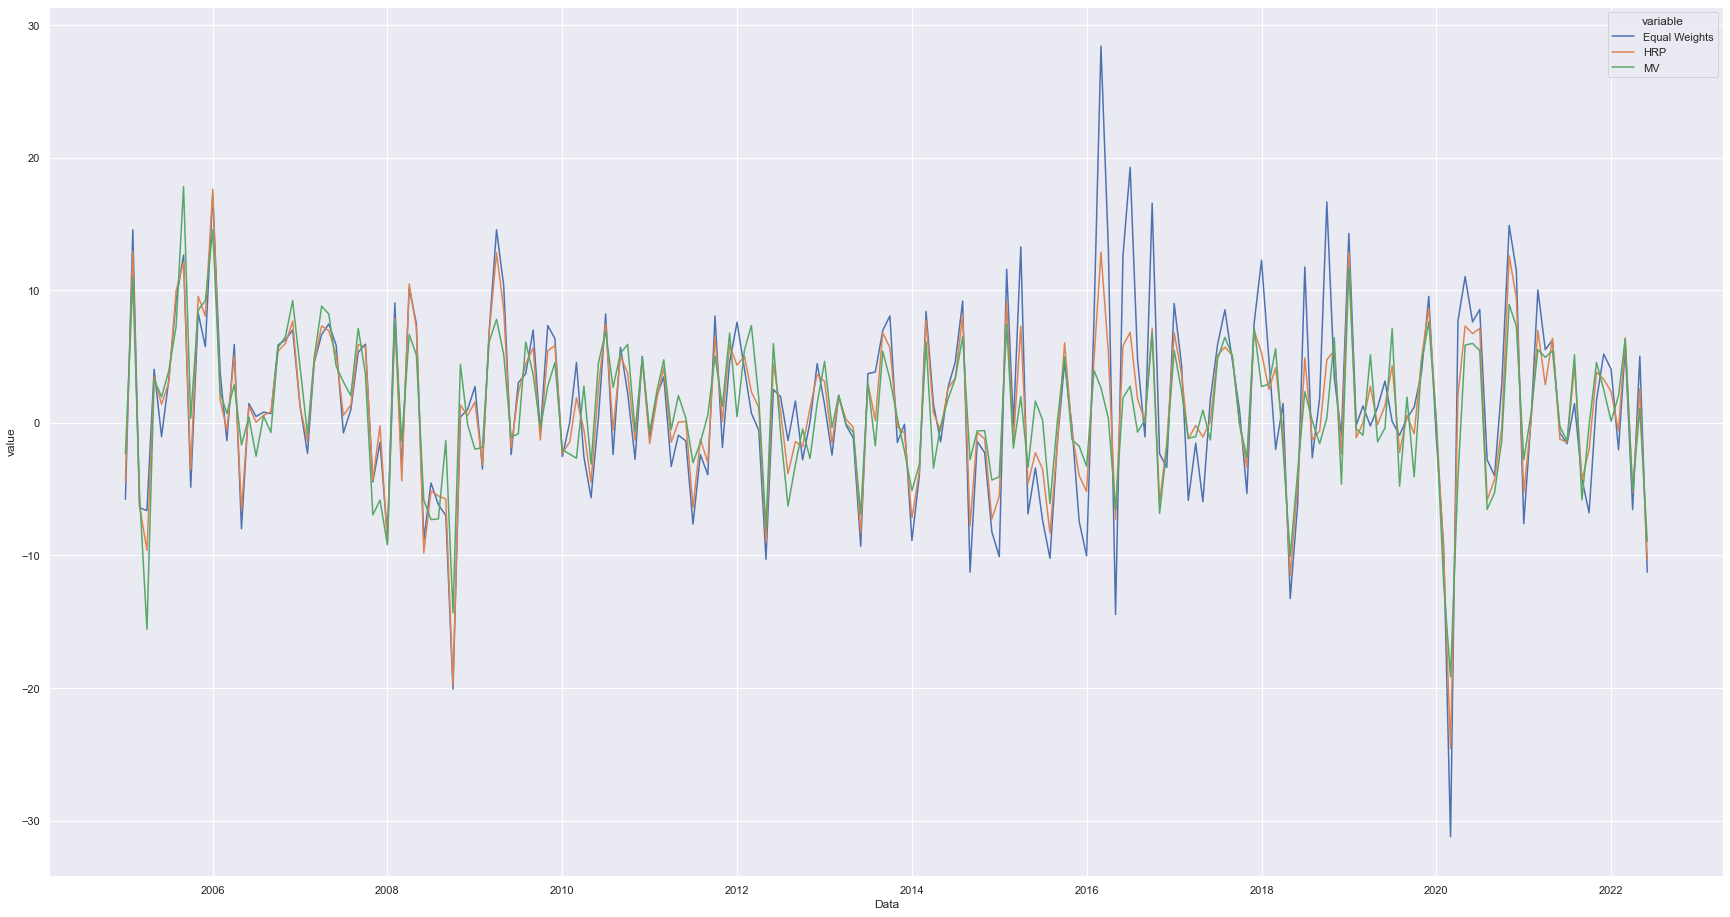

In [5]:
sns.set(rc = {'figure.figsize':(30,16)})
sns.lineplot(x='Data', y='value', hue='variable', 
             data=pd.melt(df, ['Data']))

In [ ]:
pandemic = df.loc['2020-03-01':'2014-02-01']
